# Extracción de datos web

## Índice
1. [Recepción de páginas web con urllib](#urllib)
2. [Parsing de HTML mediante BeatifulSoup](#bea)
3. [Ejemplos de web scraping](#ejemplos)
4. [Web scraping con selenium](#sele)

<a id="urllib"></a>
## Recepción de páginas web con urllib

In [3]:
import urllib.request
f = urllib.request.urlopen('https://www.rtve.es')
print(f.read().decode('latin-1'))

<!DOCTYPE html><html lang="es">
	<head>
                    <title>Noticias de última hora, programas y series de televisión - RTVE.es</title>
            <meta name="description" content="Noticias, deportes, actualidad, álbumes, series y programas, y la última hora de España y el mundo.">                            <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">    <meta name="generator" content="BBT bCube NX">    <meta property="og:description" content="Noticias, deportes, actualidad, álbumes, series y programas, y la última hora de España y el mundo.">    <meta property="og:image" content="http://www.rtve.es/contenidos/imagenes/rtve_facebook.jpg">    <meta property="og:locale" content="es_ES">    <meta property="og:site_name" content="RTVE.es">    <meta property="og:title" content="Noticias de última hora, programas y series de televisión - RTVE.es">    <meta property="og:type" content="website">    <meta property="og:url" content="https://www.rtve.es/">    <meta

Puede ocurrir que urllib devuelva un error de fallo en la verificación del certificado SSL:  

`urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed`

SSL (*Secure Sockets Layer*) es un certificado que asegura que una página web es de confianza. 

Para ignorar la autenticación de certificado SSL no verificado en urllib tenemos dos opciones:

In [4]:
import ssl
import urllib.request
context = ssl._create_unverified_context()

urllib.request.urlopen('https://www.elpais.com',context=context).read().decode()

'<!DOCTYPE html><html lang="es-ES"><head><meta charset="UTF-8"/><meta name="viewport" content="width=device-width, initial-scale=1.0"/><link rel="preconnect" href="//static.elpais.com"/><link rel="preconnect" href="//ep00.epimg.net"/><link rel="preconnect" href="//imagenes.elpais.com"/><link rel="preconnect" href="//assets.adobedtm.com"/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Roman.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/marcin-ant-b/marcinantb-regular-webfont.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold-Italic.woff2" as="font" type="font/woff2" crossorigin=""/><link re

In [5]:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

<a id="bea"></a>
## Parsing de HTML mediante BeatifulSoup

BeautifulSoup es una librería de Python que permite analizar documentos HTML y extraer datos de ellos, compensando imperfecciones que puedan existir. Para instalar esta librería escribimos en anaconda Prompt:  
`conda install -c anaconda beautifulsoup4`

Esta librería permite, por ejemplo, extraer los atributos href de las etiquetas de anclaje (a)  
<img src='http://www.cellbiol.com/bioinformatics_web_development/wp-content/uploads/2017/01/attributes_and_values_in_the_a_tag.png'>  
En el siguiente ejemplo, vamos a parsear una entrada HTML y extraer los links utilizando la librería BeautifulSoup. 
Utilizaremos urllib para leer la página y después BeautifulSoup para extraer los atributos href de las etiquetas de tipo ancla (a)

In [12]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://www.marca.com'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

tags = soup('a')

for tag in tags:
    print(tag.get('href'))

https://www.marca.com/futbol/real-madrid/2024/06/03/64c7ab27e2704e5f138b458d.html
https://www.marca.com/futbol/real-madrid/2024/06/03/665de1e6d6a5d900270124ad-directo.html
https://www.marca.com/futbol/real-madrid/2024/06/03/665d91dd268e3eab1c8b45d4.html
https://www.marca.com/futbol/real-madrid/2024/06/03/665ded92268e3e81168b4572.html
https://www.marca.com/futbol/real-madrid/2024/06/03/6655f0c722601d91738b456c.html
https://www.marca.com/futbol/real-madrid/2024/06/03/665e02b8ca4741326e8b4601.html
https://www.marca.com/tenis/roland-garros/novak-djokovic-francisco-cerundolo/2024/06/03/04_0402_20240603_113-directo.html
https://www.marca.com/motor/motogp/gp-italia/2024/06/03/665dd6ebca4741ba6c8b45d3.html
https://www.marca.com/motor/motogp/gp-italia/2024/06/03/665deaafca474109728b45e7.html
https://www.marca.com/tiramillas/actualidad/2024/06/03/665d86b57dd0160026cd8b25-directo.html
https://www.marca.com/futbol/mercado-fichajes/2024/06/03/665d6e4e7dd0160026cd7b80-directo.html
https://www.marca.

Podemos extraer más campos de las etiquetas

In [15]:
for tag in tags:
    print('URL:', tag.get('href'))
    print('Texto:', tag.text)
    print('\r')

URL: https://www.marca.com/futbol/real-madrid/2024/06/03/64c7ab27e2704e5f138b458d.html
Texto: Mbappé Real Madrid

URL: https://www.marca.com/futbol/real-madrid/2024/06/03/665de1e6d6a5d900270124ad-directo.html
Texto: Fichaje Mbappé

URL: https://www.marca.com/futbol/real-madrid/2024/06/03/665d91dd268e3eab1c8b45d4.html
Texto: Presentación Mbappé

URL: https://www.marca.com/futbol/real-madrid/2024/06/03/665ded92268e3e81168b4572.html
Texto: Camiseta Mbappé

URL: https://www.marca.com/futbol/real-madrid/2024/06/03/6655f0c722601d91738b456c.html
Texto: Dorsal Mbappé

URL: https://www.marca.com/futbol/real-madrid/2024/06/03/665e02b8ca4741326e8b4601.html
Texto: Mbappé comunicado

URL: https://www.marca.com/tenis/roland-garros/novak-djokovic-francisco-cerundolo/2024/06/03/04_0402_20240603_113-directo.html
Texto: Djokovic - Cerúndolo

URL: https://www.marca.com/motor/motogp/gp-italia/2024/06/03/665dd6ebca4741ba6c8b45d3.html
Texto: Márquez Ducati

URL: https://www.marca.com/motor/motogp/gp-italia/

Puedes encontrar la documentación de beautifulsoup en https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<a id="ejemplos"></a>
## Ejemplos de web scraping

### 1. Frecuencia de las palabras de un discurso  
Vamos a obtener la frecuencia de las palabras del siguiente discurso: https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [21]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html'

html = urllib.request.urlopen(url)
soup2 = BeautifulSoup(html)
tags = soup2('p')

tags

discurso = ''

for tag in tags:
    if tag.text == 'Traducción de New Clips': break
    discurso += tag.text

discurso = discurso.replace(',',' ').replace('.',' ').replace(':',' ').replace('?',' ').replace('"',' ')

palabras = discurso.lower().split()

contadores = {}

for palabra in palabras:
    if len(palabra)>3 and palabra not in ['esta','para','este','estos','esos']:
        contadores[palabra] = contadores.get(palabra, 0) +1
    
import pandas as pd
df = pd.DataFrame(list(contadores.items()), columns=['palabra','contador'])
df.sort_values('contador',ascending=False)

,palabra,contador
12,estadounidenses,33
543,nuestros,28
29,nuestro,28
10,unidos,27
55,hemos,27
...,...,...
768,económica,1
767,rendición,1
766,riqueza,1
765,llevaban,1


### 2. Web Scraping de bitcoin
Extraemos el valor más reciente de Bitcoin en https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin

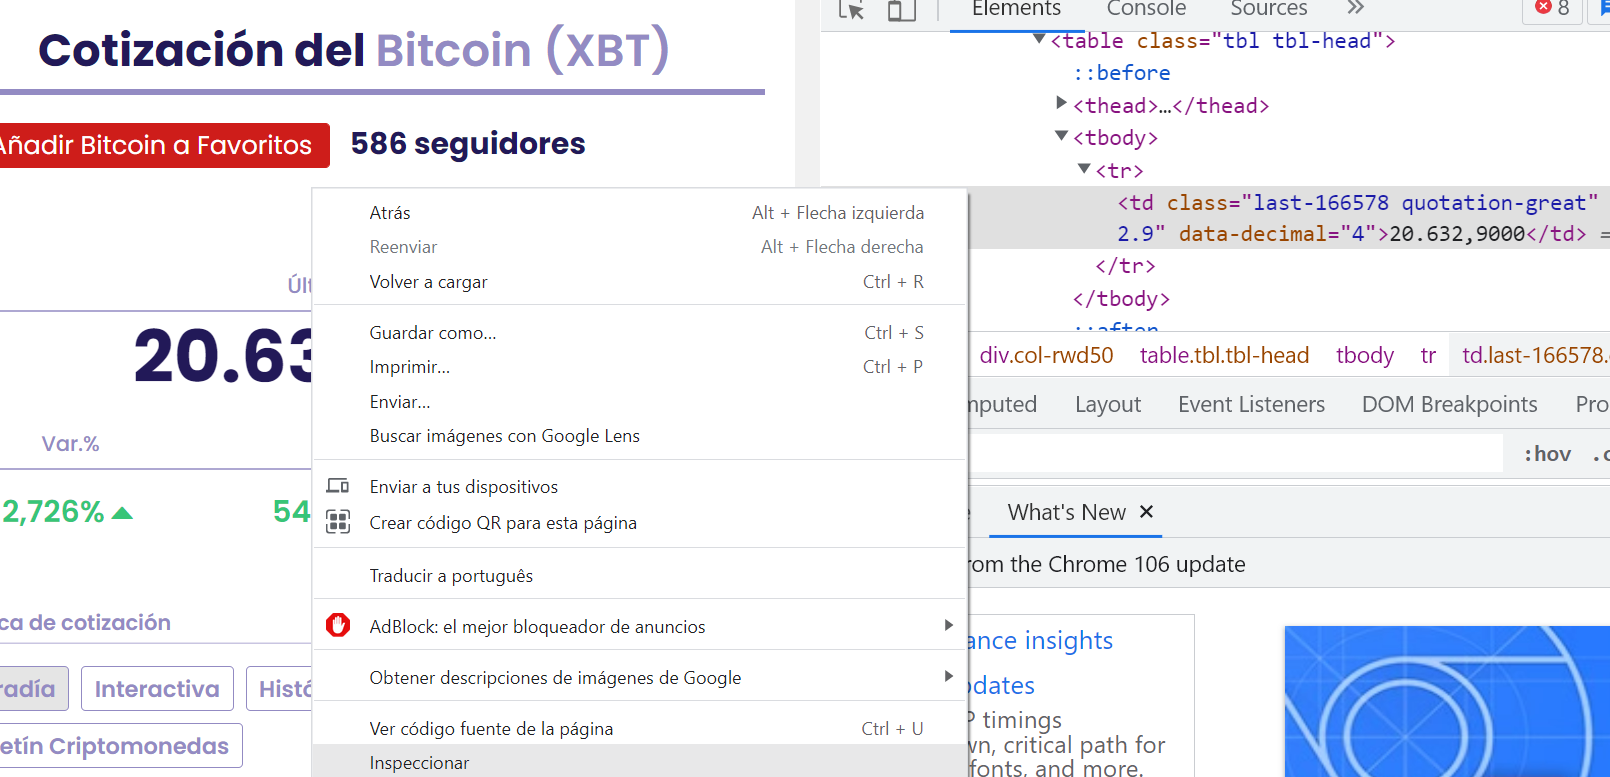

In [33]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

tags = soup.find_all('td', class_='last-166578 quotation-great')

float(tags[0].text.replace('.','').replace(',','.'))

69306.9

### 3. Web scraping con pandas 

La función `read_html()` de pandas también permite extraer tablas de páginas web, devolviendo una lista de dataframes con todas las tablas que existan.  
Por ejemplo, vamos a hacer scraping de la siguiente tabla: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

Es necesario instalar la librería `lxml`: `conda install -c conda-forge lxml`

In [ ]:
!pip install lxml

In [50]:
import pandas as pd
url = 'https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'
tablas = pd.read_html(url)
#tablas[0]#.StateSt.value_counts()
tablas[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association","April 26, 2024",10546
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.","July 28, 2023",10544
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
...,...,...,...,...,...,...,...
564,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
565,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
566,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
567,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


### 4. Agente de usuario

El **agente de usuario** es un identificador con el que un programa inicia sesión en el servidor web para solicitar datos

Cuando un usuario accede a una página web, la aplicación generalmente envía una cadena de texto que identifica al agente de usuario ante el servidor. Este texto forma parte de la petición a través de HTTP, llevando como prefijo
*User-Agent*, y generalmente incluye información como el nombre de la aplicación, la versión, el sistema operativo, y el idioma. 

La identificación de agente de usuario es uno de los criterios de exclusión utilizado para impedir el acceso a ciertas secciones de un sitio web.

Ejemplo: Obtenemos la altura de los futbolistas desde la web de transfermarkt:  
https://www.transfermarkt.es/lionel-messi/profil/spieler/28003


In [62]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.transfermarkt.es/lionel-messi/profil/spieler/28003'
req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
)

f = urllib.request.urlopen(req)
soup = BeautifulSoup(f)
tags = soup.find_all(attrs={'itemprop':'height'})
altura = float(tags[0].text.replace(' m','').replace(',','.'))
altura

1.7

## <span style="color:red">Do it yourself</span>

Obtén los equipos que hayan ganado LaLiga en los últimos 4 años con su puntuación a partir de la siguiente URL: https://resultados.as.com/resultados/futbol/primera/2021_2022/clasificacion/  

| Temporada | Club        | Puntos |
|-----------|-------------|--------|
| 19/20     | Real Madrid | 87     |
| 18/19     | Barcelona   | 87     |
| ...       | ...         | ...    |

In [64]:
import pandas as pd

df = pd.DataFrame()

for temp in range(18,24):
    temporada = '20' + str(temp) + '_' + '20' + str(temp+1)
    url = 'https://resultados.as.com/resultados/futbol/primera/' + temporada + '/clasificacion/'
    print(url)
    tablas = pd.read_html(url)
    table = tablas[0]
    equipo = table.iloc[0,0].replace('1','').strip()
    puntos = table.iloc[0,1]

    df_temp = pd.DataFrame({'Temporada':[temporada],
                           'Club':[equipo],
                           'Puntos':[puntos]})
    
    df = pd.concat([df, df_temp], axis=0)

df.reset_index(drop=True)

https://resultados.as.com/resultados/futbol/primera/2018_2019/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2019_2020/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2020_2021/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2021_2022/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2022_2023/clasificacion/
https://resultados.as.com/resultados/futbol/primera/2023_2024/clasificacion/


,Temporada,Club,Puntos
0,2018_2019,Barcelona,87
1,2019_2020,Real Madrid,87
2,2020_2021,Atlético,86
3,2021_2022,Real Madrid,86
4,2022_2023,Barcelona,88
5,2023_2024,Real Madrid,95


## <span style="color:red">Do it yourself</span>
Extrae el precio de la leche Pascual entera de 1L en Carrefour

In [75]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.carrefour.es/supermercado/leche-entera-pascual-brik-1-l/R-521006986/p?ic_source=portal-y-corporativo&ic_medium=search-empathy&ic_content=ns'

html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)
tags = soup.find_all('span', class_='buybox__price--current')
precio = float(tags[0].text.strip().replace(' €','').replace(',','.'))
precio

1.14

In [ ]:
import sqlite3
leche = sqlite3.connect('leche.sqlite')

In [76]:
from datetime import datetime
import pandas as pd
fecha_hoy = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame({'Producto':['Leche Entera Pascual'],
                  'Fecha':[fecha_hoy],
                  'Precio':[precio]})
df

,Producto,Fecha,Precio
0,Leche Entera Pascual,2024-06-03,1.14


In [ ]:
df.to_sql('LECHE', con=leche, if_exists='append')

Intenta extraer el precio de alguno de estos productos: https://tienda.mercadona.es/search-results?query=leche%20entera

In [78]:
url = 'https://tienda.mercadona.es/search-results?query=leche%20entera'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)
tags = soup.find_all('h4', class_='subhead1-r product-cell__description-name')
tags

[]

<a id="sele"></a>
## Web Scraping con Selenium

Selenium es una librería que permite automatizar navegadores web

Documentación: https://selenium-python.readthedocs.io/

Instalar librerías `selenium` y `webdriver_manager`

In [91]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Instalar y obtener la ruta del ChromeDriver
service = Service(ChromeDriverManager().install())

# Inicializar el WebDriver usando la ruta obtenida
driver = webdriver.Chrome(service=service)


In [93]:
import selenium
selenium.__version__

'4.21.0'

### Ejemplo 1: Introducir una búsqueda en la web de carrefour y extraer el precio de los productos

In [82]:
# Accedemos a la web
driver.get('https://www.carrefour.es')

In [83]:
# Aceptar cookies
driver.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]').click()

In [84]:
# Buscar producto
driver.find_element('xpath', '//*[@id="search-input"]').click()

In [85]:
driver.find_element('xpath', '//*[@id="empathy-x"]/header/div[1]/div/input[3]').send_keys('Leche Pascual')

In [86]:
# Extraer el HTML
html = driver.page_source

In [87]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
productos = soup.find_all('h1', class_='ebx-result-title ebx-result__title')
lista_productos = []

for producto in productos:
    lista_productos.append(producto.text)

lista_productos

['Leche semidesnatada Pascual botella 1,5 l.',
 'Leche desnatada Pascual sin lactosa brik 1 l.',
 'Leche entera Pascual brik 1 l.',
 'Leche semidesnatada Pascual sin lactosa pack de 6 briks de 200 ml.',
 'Leche semidesnatada Pascual brik 1 l.',
 'Leche entera Pascual sin lactosa brik 1 l.',
 'Leche desnatada 0% MG con calcio Pascual brik 1 l.',
 'Leche desnatada 0% MG Pascual botella 1,5 l.',
 'Leche Dinamic Protein Pascual sin lactosa 1 l.',
 'Mazada bebida láctea natural Pastor de Aranda Pascual brik 1 l.']

In [88]:
precios = soup.find_all('strong', class_='ebx-result-price__value')
lista_precios = []
for precio in precios:
    lista_precios.append(precio.text)
lista_precios

['1,84 €',
 '1,52 €',
 '1,14 €',
 '3,25 €',
 '1,14 €',
 '1,52 €',
 '1,39 €',
 '1,84 €',
 '1,39 €',
 '0,85 €']

In [89]:
from datetime import datetime
import pandas as pd
fecha_hoy = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame({'Fecha':[fecha_hoy]*len(lista_precios),
                  'Producto':lista_productos,
                  'Precio':lista_precios})
df

,Fecha,Producto,Precio
0,2024-06-03,"Leche semidesnatada Pascual botella 1,5 l.","1,84 €"
1,2024-06-03,Leche desnatada Pascual sin lactosa brik 1 l.,"1,52 €"
2,2024-06-03,Leche entera Pascual brik 1 l.,"1,14 €"
3,2024-06-03,Leche semidesnatada Pascual sin lactosa pack d...,"3,25 €"
4,2024-06-03,Leche semidesnatada Pascual brik 1 l.,"1,14 €"
5,2024-06-03,Leche entera Pascual sin lactosa brik 1 l.,"1,52 €"
6,2024-06-03,Leche desnatada 0% MG con calcio Pascual brik ...,"1,39 €"
7,2024-06-03,"Leche desnatada 0% MG Pascual botella 1,5 l.","1,84 €"
8,2024-06-03,Leche Dinamic Protein Pascual sin lactosa 1 l.,"1,39 €"
9,2024-06-03,Mazada bebida láctea natural Pastor de Aranda ...,"0,85 €"


In [90]:
driver.quit()

In [94]:
driver.get('https://tienda.mercadona.es')

In [95]:
# Aceptar Cookies
driver.find_element('xpath','//*[@id="root"]/div[1]/div/div/button[2]').click()

In [96]:
# Código Postal
driver.find_element('xpath','//*[@id="root"]/div[4]/div/div[2]/div/form/div/input').send_keys('28043')

In [97]:
# Aceptar el código postal
driver.find_element('xpath','//*[@id="root"]/div[4]/div/div[2]/div/form/button/span').click()

In [98]:
# Cuadro de búsqueda
driver.find_element('xpath','//*[@id="search"]').send_keys('Leche entera')

In [99]:
html = driver.page_source

In [100]:
soup = BeautifulSoup(html)
productos = soup.find_all('h4',class_='subhead1-r product-cell__description-name')
lista_productos = [el.text for el in productos]
lista_productos

['Leche entera Hacendado',
 'Leche entera Asturiana',
 'Leche entera Hacendado',
 'Leche entera Hacendado',
 'Leche entera Asturiana',
 'Leche entera Asturiana',
 'Leche entera Hacendado',
 'Leche entera Asturiana',
 'Leche entera Hacendado',
 'Leche entera fresca Hacendado',
 'Leche entera calcio Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche entera calcio Hacendado',
 'Chocolate extrafino con leche Hacendado almendras enteras',
 'Chocolate con leche Valor almendras enteras',
 'Chocolate con leche Valor almendras enteras']

In [104]:
soup.find_all('p',class_='product-price__unit-price subhead1-b product-price__unit-price--discount')

[<p class="product-price__unit-price subhead1-b product-price__unit-price--discount" data-testid="product-price">6,54 €</p>,
 <p class="product-price__unit-price subhead1-b product-price__unit-price--discount" data-testid="product-price">1,09 €</p>]

In [105]:
precios = soup.find_all('p',class_='product-price__unit-price subhead1-b')
precios2 = soup.find_all('p',class_='product-price__unit-price subhead1-b product-price__unit-price--discount')
lista_precios = [tag.text for tag in precios]
lista_precios

['5,46 €',
 '1,60 €',
 '0,91 €',
 '10,68 €',
 '8,82 €',
 '1,78 €',
 '1,47 €',
 '1,05 €',
 '6,60 €',
 '0,99 €',
 '5,94 €',
 '1,10 €',
 '1,65 €',
 '3,90 €',
 '3,25 €']

In [ ]:
precio

In [106]:
len(lista_productos), len(lista_precios)

(17, 15)

In [107]:
from datetime import datetime
import pandas as pd
fecha_hoy = datetime.today().strftime('%Y-%m-%d')

df2 = pd.DataFrame({'Fecha':[fecha_hoy]*len(lista_precios),
                  'Producto':lista_productos,
                  'Precio':lista_precios})

df3 = df2.loc[df2.Producto.str.contains('Leche')]
df3

ValueError: All arrays must be of the same length

In [108]:
driver.quit()

### Ejemplo 3: SIAR

[Link al Notebook](./Web%20Scraping%20con%20Selenium(SIAR).ipynb)